
# Picture notebook!

In [1]:
using Plots
using DelimitedFiles

## Model Selection

In [2]:
try_max = 50
T = 40
AUSI = zeros(try_max,T)
AUSEIR = zeros(try_max,T)
distance = zeros(try_max,T)

for trial in 1:try_max
    AUSI[trial,:] = readdlm("./ModelSelection/NonMarkovMS/try$(trial)_AUcauSI.txt")
    AUSEIR[trial,:] = readdlm("./ModelSelection/NonMarkovMS/try$(trial)_AUcauSEIR.txt")
    distance[trial,:] = readdlm("./ModelSelection/NonMarkovMS/try$(trial)_distance.txt")
end

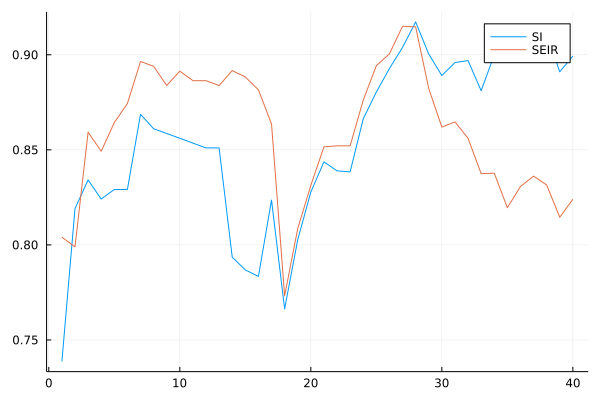

In [3]:
trial = 4
plot(AUSI[trial,:], label = "SI")
plot!(AUSEIR[trial,:], label = "SEIR")

In [22]:
SIErr=[err(AUSI[:,t]) for t in 1:T]
SEIRErr=[err(AUSEIR[:,t]) for t in 1:T]
distErr = [err(distance[:,t]) for t in 1:T];

In [23]:
plot(avg(AUSI)', yerror=SIErr, label="SI")
plot!(avg(AUSEIR)',yerror=SEIRErr, label="SEIR")
ylims!(0.5,1)
savefig("./ModelSelection/SEIRvsSI.pdf")


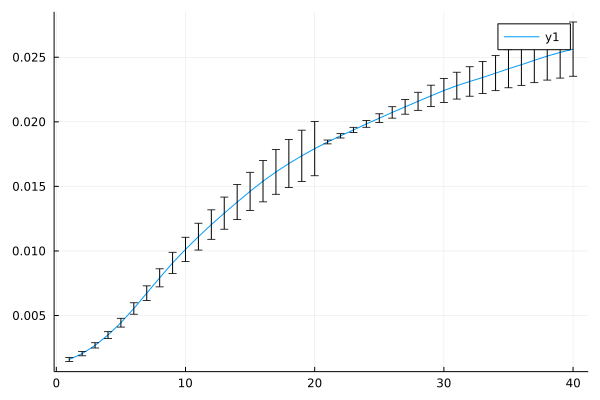

In [24]:
plot(avg(distance)', yerror = distErr)

## SimulatedGraphs Inference

In [31]:
try_max = 5
nobs_set = [10, 25, 40, 80, 160, 300]
pahtstring = "./SimulatedGraphs/SimulatedGraphData2/"
T = 20
AUcau = zeros(try_max,length(nobs_set),T)
AUsoft = zeros(try_max,length(nobs_set),T)
AUsib = zeros(try_max,length(nobs_set),T)
AUheu = zeros(try_max,length(nobs_set),T)
AUmh = zeros(try_max,length(nobs_set),T)
AUMF = zeros(try_max,length(nobs_set),T)
for trial = 1:try_max
    for r = 1:length(nobs_set) 
        nobs = nobs_set[r]
        AUcau[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)cau.txt") 
        AUsoft[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)soft.txt")
        AUsib[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)sib.txt")
        AUheu[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)fre.txt")
        AUmh[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)mc.txt")
        AUMF[trial,r,:] = readdlm("$(pahtstring)try$(trial)nobs$(nobs)mf.txt")
    end
end

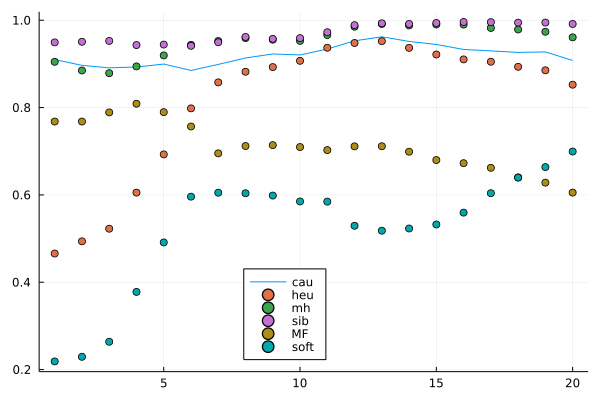

In [32]:
tr, obs = 1,6
plot(AUcau[tr,obs,:],label="cau")
scatter!(AUheu[tr,obs,:],label="heu")
scatter!(AUmh[tr,obs,:],label="mh")
scatter!(AUsib[tr,obs,:],label="sib")
scatter!(AUMF[tr,obs,:],label="MF")
scatter!(AUsoft[tr,obs,:],label="soft", legend = :bottom)

#ylims!(0.5,1.01)

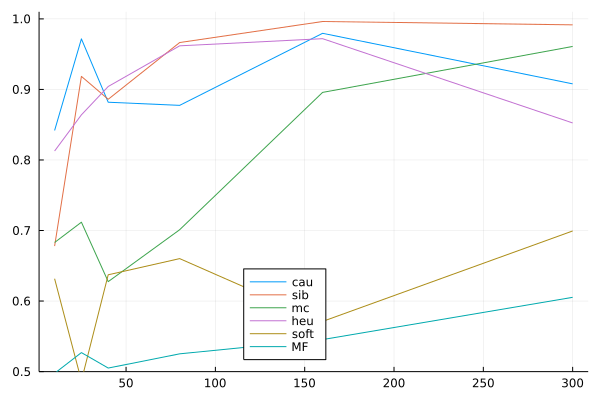

In [33]:
tr, time = 1 , T
plot(nobs_set,AUcau[tr,:,time],label="cau", legend=:bottom)
plot!(nobs_set,AUsib[tr,:,time], label = "sib")
plot!(nobs_set,AUmh[tr,:,time], label = "mc")
plot!(nobs_set,AUheu[tr,:,time], label = "heu")
plot!(nobs_set,AUsoft[tr,:,time], label="soft")
plot!(nobs_set,AUMF[tr,:,time], label="MF")

#savefig("../provaSoft")
ylims!(0.5,1.01)

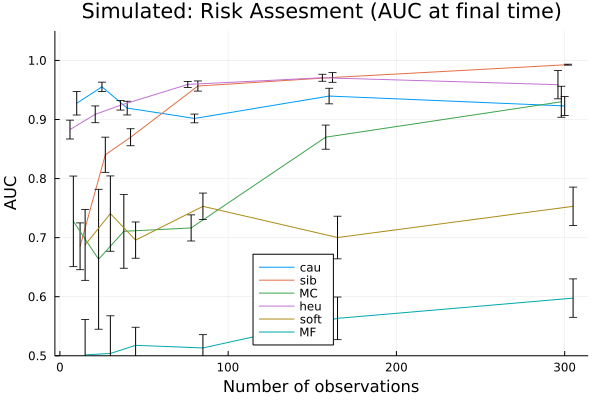

In [34]:
function avg(AU, dims=1)
    sum(AU,dims=dims)/size(AU,dims)
end

function err(vec)
    sqrt(sum((vec .- avg(vec)) .^ 2 ) / length(vec)^2)
end

cauErr=[err(AUcau[:,r,end]) for r in 1:length(nobs_set)]
softErr=[err(AUsoft[:,r,end]) for r in 1:length(nobs_set)]
mhErr=[err(AUmh[:,r,end]) for r in 1:length(nobs_set)]
sibErr=[err(AUsib[:,r,end]) for r in 1:length(nobs_set)]
heuErr=[err(AUheu[:,r,end]) for r in 1:length(nobs_set)]
mfErr=[err(AUMF[:,r,end]) for r in 1:length(nobs_set)]

plot(nobs_set,avg(AUcau[:,:,end])',yerror=cauErr,label="cau",title="Simulated: Risk Assesment (AUC at final time)")
plot!(nobs_set .+ 2,avg(AUsib[:,:,end])',yerror=sibErr,label="sib",xlabel="Number of observations")
plot!(nobs_set .- 2,avg(AUmh[:,:,end])',yerror=mhErr,label="MC",ylabel="AUC",legend=:bottom)
plot!(nobs_set .- 4,avg(AUheu[:,:,end])',yerror=heuErr,label="heu")
plot!(nobs_set .+ 5,avg(AUsoft[:,:,end])',yerror=softErr,label="soft")
plot!(nobs_set .+ 5,avg(AUMF[:,:,end])',yerror=softErr,label="MF")
ylims!(0.5,1.05)
#savefig("./SimulatedGraphs/SimulatedGraphPictures/RiskAssesment")

In [35]:
AUsoft[:,1,end]

5-element Vector{Float64}:
 0.6316832396598933
 0.4985457579882039
 0.6491277932241784
 0.7617493028633614
 0.8971261152853978

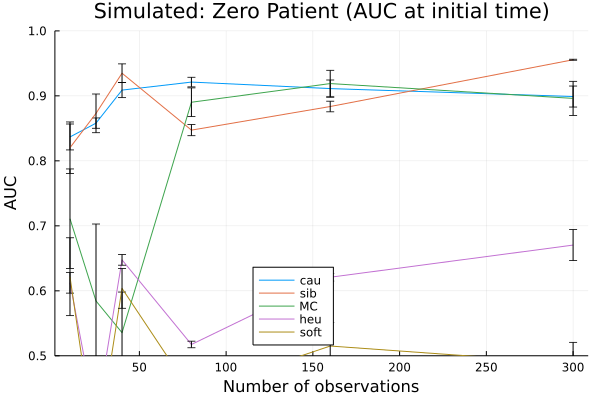

In [36]:
plot(nobs_set,avg(AUcau[:,:,1])',yerror=cauErr,label="cau",title="Simulated: Zero Patient (AUC at initial time)")
plot!(nobs_set,avg(AUsib[:,:,1])',yerror=sibErr,label="sib",xlabel="Number of observations")
plot!(nobs_set,avg(AUmh[:,:,1])',yerror=mhErr,label="MC",ylabel="AUC",legend=:bottom)
plot!(nobs_set,avg(AUheu[:,:,1])',yerror=heuErr,label="heu")
plot!(nobs_set,avg(AUsoft[:,:,1])',yerror=softErr,label="soft")
#plot!(nobs_set,avg(AUMF[:,:,1])',yerror=softErr,label="MF")
ylims!(0.5,1)
#savefig("./RealGraph/RealGraphPictures/ZeroPatient")

## Real Graph Inference (Hospitals)

In [6]:
try_max = 15
nobs_set = [10, 25, 40, 80, 160, 300]

T = 20
AUcau = zeros(try_max,length(nobs_set),T)
AUsoft = zeros(try_max,length(nobs_set),T)
AUsib = zeros(try_max,length(nobs_set),T)
AUheu = zeros(try_max,length(nobs_set),T)
AUmh = zeros(try_max,length(nobs_set),T)
for trial = 1:try_max
    for r = 1:length(nobs_set) 
        nobs = nobs_set[r]
        AUcau[trial,r,:] = readdlm("./RealGraph/RealGraphData4/try$(trial)nobs$(nobs)cau.txt") 
        AUsoft[trial,r,:] = readdlm("./RealGraph/RealGraphData4/try$(trial)nobs$(nobs)soft.txt")
        AUsib[trial,r,:] = readdlm("./RealGraph/RealGraphData4/try$(trial)nobs$(nobs)sib.txt")
        AUheu[trial,r,:] = readdlm("./RealGraph/RealGraphData4/try$(trial)nobs$(nobs)fre.txt")
        AUmh[trial,r,:] = readdlm("./RealGraph/RealGraphData4/try$(trial)nobs$(nobs)mc.txt")
    end
end

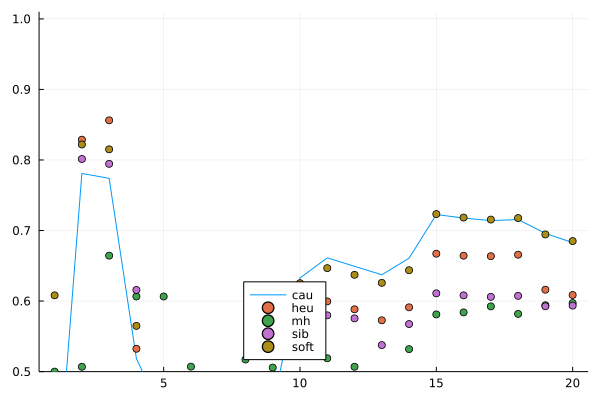

In [7]:
tr, obs = 4,1
plot(AUcau[tr,obs,:],label="cau")
scatter!(AUheu[tr,obs,:],label="heu")
scatter!(AUmh[tr,obs,:],label="mh")
scatter!(AUsib[tr,obs,:],label="sib")
scatter!(AUsoft[tr,obs,:],label="soft", legend = :bottom)

ylims!(0.5,1.01)

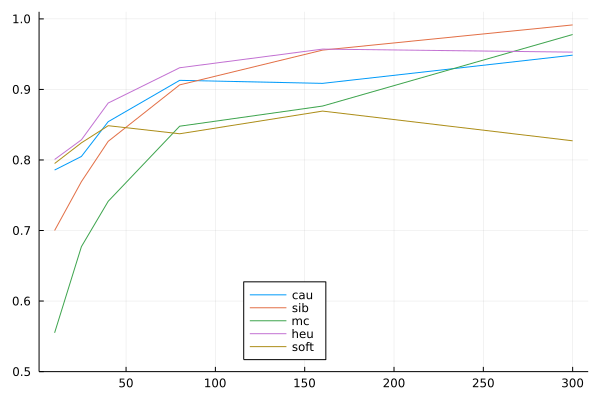

In [8]:
tr, time = 3 , T
plot(nobs_set,AUcau[tr,:,time],label="cau", legend=:bottom)
plot!(nobs_set,AUsib[tr,:,time], label = "sib")
plot!(nobs_set,AUmh[tr,:,time], label = "mc")
plot!(nobs_set,AUheu[tr,:,time], label = "heu")
plot!(nobs_set,AUsoft[tr,:,time], label="soft")

#savefig("../provaSoft.pdf")
ylims!(0.5,1.01)

In [9]:
function avg(AU, dims=1)
    sum(AU,dims=dims)/size(AU,dims)
end

function err(vec)
    sqrt(sum((vec .- avg(vec)) .^ 2 ) / length(vec)^2)
end

err (generic function with 1 method)

In [10]:
err(AUcau[:,1,1])

0.05454401328251281

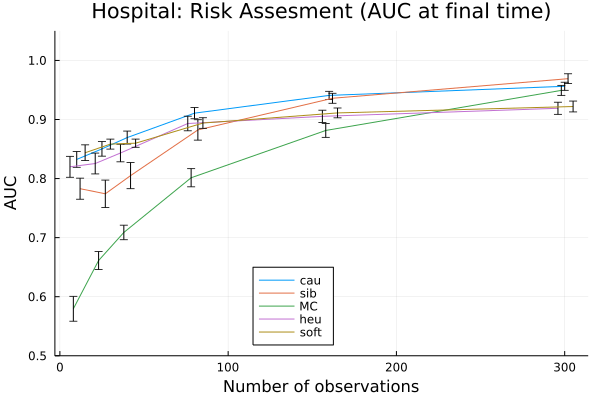

In [12]:
function avg(AU, dims=1)
    sum(AU,dims=dims)/size(AU,dims)
end

function err(vec)
    sqrt(sum((vec .- avg(vec)) .^ 2 ) / length(vec)^2)
end

cauErr=[err(AUcau[:,r,end]) for r in 1:length(nobs_set)]
softErr=[err(AUsoft[:,r,end]) for r in 1:length(nobs_set)]
mhErr=[err(AUmh[:,r,end]) for r in 1:length(nobs_set)]
sibErr=[err(AUsib[:,r,end]) for r in 1:length(nobs_set)]
heuErr=[err(AUheu[:,r,end]) for r in 1:length(nobs_set)]

plot(nobs_set,avg(AUcau[:,:,end])',yerror=cauErr,label="cau",title="Hospital: Risk Assesment (AUC at final time)")
plot!(nobs_set .+ 2,avg(AUsib[:,:,end])',yerror=sibErr,label="sib",xlabel="Number of observations")
plot!(nobs_set .- 2,avg(AUmh[:,:,end])',yerror=mhErr,label="MC",ylabel="AUC",legend=:bottom)
plot!(nobs_set .- 4,avg(AUheu[:,:,end])',yerror=heuErr,label="heu")
plot!(nobs_set .+ 5,avg(AUsoft[:,:,end])',yerror=softErr,label="soft")
ylims!(0.5,1.05)

In [25]:
plot(nobs_set,avg(AUcau[:,:,end])',yerror=cauErr,label="cau",title="Hospital: Risk Assesment (AUC at final time)")
plot!(nobs_set .+ 2,avg(AUsib[:,:,end])',yerror=sibErr,label="sib",xlabel="Number of observations")
plot!(nobs_set .- 2,avg(AUmh[:,:,end])',yerror=mhErr,label="MC",ylabel="AUC",legend=:bottom)
plot!(nobs_set .- 4,avg(AUheu[:,:,end])',yerror=heuErr,label="heu")
plot!(nobs_set .+ 5,avg(AUsoft[:,:,end])',yerror=softErr,label="soft")
ylims!(0.5,1.05)
savefig("./RealGraph/RealGraphPictures/RiskAssesment.pdf")

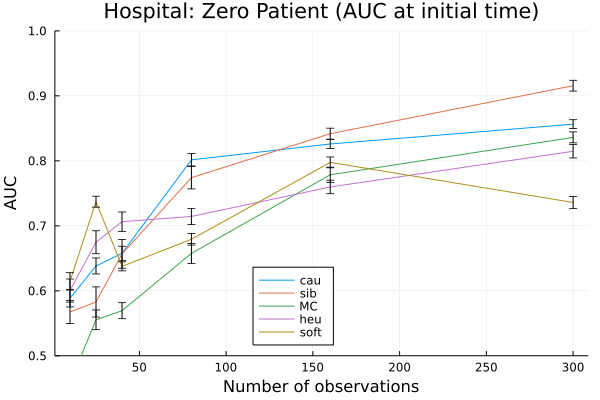

In [15]:
plot(nobs_set,avg(AUcau[:,:,1])',yerror=cauErr,label="cau",title="Hospital: Zero Patient (AUC at initial time)")
plot!(nobs_set,avg(AUsib[:,:,1])',yerror=sibErr,label="sib",xlabel="Number of observations")
plot!(nobs_set,avg(AUmh[:,:,1])',yerror=mhErr,label="MC",ylabel="AUC",legend=:bottom)
plot!(nobs_set,avg(AUheu[:,:,1])',yerror=heuErr,label="heu")
plot!(nobs_set,avg(AUsoft[:,:,1])',yerror=softErr,label="soft")
ylims!(0.5,1)
#savefig("./RealGraph/RealGraphPictures/ZeroPatient.pdf")

## Hyperparameters Inference

In [16]:
d1=readdlm("./Hyperparams/descent.txt")
d2=readdlm("./Hyperparams/descent2.txt")
d3=readdlm("./Hyperparams/descent3.txt")
d4=readdlm("./Hyperparams/descent4.txt")
d5=readdlm("./Hyperparams/descent5.txt")
fe=readdlm("./Hyperparams/hyperparams.txt");

In [17]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(log.(log.(fe'))), xlabel="pseed", ylabel="infection peak",title="Heat map for free energy in function of hyperparams")
plot!(d1[:,1],d1[:,2])
plot!(d2[:,1],d2[:,2])
plot!(d3[:,1],d3[:,2])
plot!(d4[:,1],d4[:,2])
plot!(d5[:,1],d5[:,2])
scatter!([d1[end,1]],[d1[end,2]])
scatter!([d2[end,1]],[d2[end,2]])
scatter!([d3[end,1]],[d3[end,2]])
scatter!([d4[end,1]],[d4[end,2]])
scatter!([d5[end,1]],[d5[end,2]])
scatter!([1/40,],[0.1],label="True")
savefig("./Hyperparams/Hyperdescent.pdf")    

## Hyperparams Comparison

In [18]:
fe_cau=readdlm("./Hyperparams/hyper_fe_cau.txt")
fe_soft=readdlm("./Hyperparams/hyper_fe_soft.txt");
fe_Ssoft=readdlm("./Hyperparams/hyper_fe_Ssoft.txt");

In [19]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_cau), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
savefig("./Hyperparams/HyperCauF.pdf")

In [20]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_soft), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
savefig("./Hyperparams/HyperSoftF.pdf")

In [21]:
heatmap(LinRange(1/400,0.25,20),LinRange(0.01,0.7,20),log.(fe_Ssoft), xlabel="pseed", ylabel="infection peak")
scatter!([1/40],[0.1],label="True")
savefig("./Hyperparams/HyperSSoftF.pdf")